     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl 

<ipython-input-2-35450c40a0d6>:177: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv(csv_file_path, on_bad_lines='skip', quoting=3)


Train set: (8102, 2)
Test set: (2120, 2)
Validation set: (1042, 2)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,1.174600,1.184407,0.474088
2,0.987400,1.141937,0.517274
3,0.520000,1.403835,0.504798


<ipython-input-2-35450c40a0d6>:62: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


Processed chunk 1/57
Processed chunk 2/57
Processed chunk 3/57
Processed chunk 4/57
Processed chunk 5/57
Processed chunk 6/57
Processed chunk 7/57
Processed chunk 8/57
Processed chunk 9/57
Processed chunk 10/57
Processed chunk 11/57
Processed chunk 12/57
Processed chunk 13/57
Processed chunk 14/57
Processed chunk 15/57
Processed chunk 16/57
Processed chunk 17/57
Processed chunk 18/57
Processed chunk 19/57
Processed chunk 20/57
Processed chunk 21/57
Processed chunk 22/57
Processed chunk 23/57
Processed chunk 24/57
Processed chunk 25/57
Processed chunk 26/57
Processed chunk 27/57
Processed chunk 28/57
Processed chunk 29/57
Processed chunk 30/57
Processed chunk 31/57
Processed chunk 32/57
Processed chunk 33/57
Processed chunk 34/57
Processed chunk 35/57
Processed chunk 36/57
Processed chunk 37/57
Processed chunk 38/57
Processed chunk 39/57
Processed chunk 40/57
Processed chunk 41/57
Processed chunk 42/57
Processed chunk 43/57
Processed chunk 44/57
Processed chunk 45/57
Processed chunk 46/

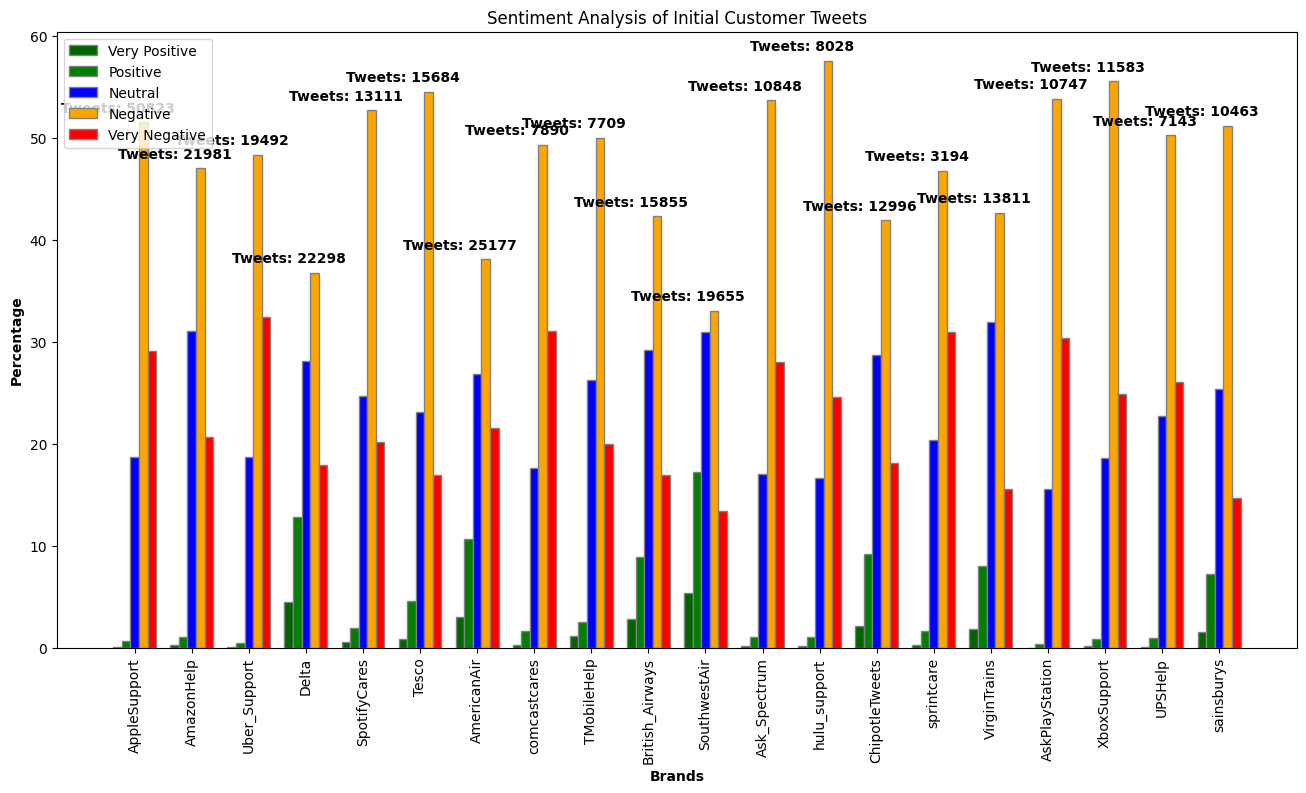

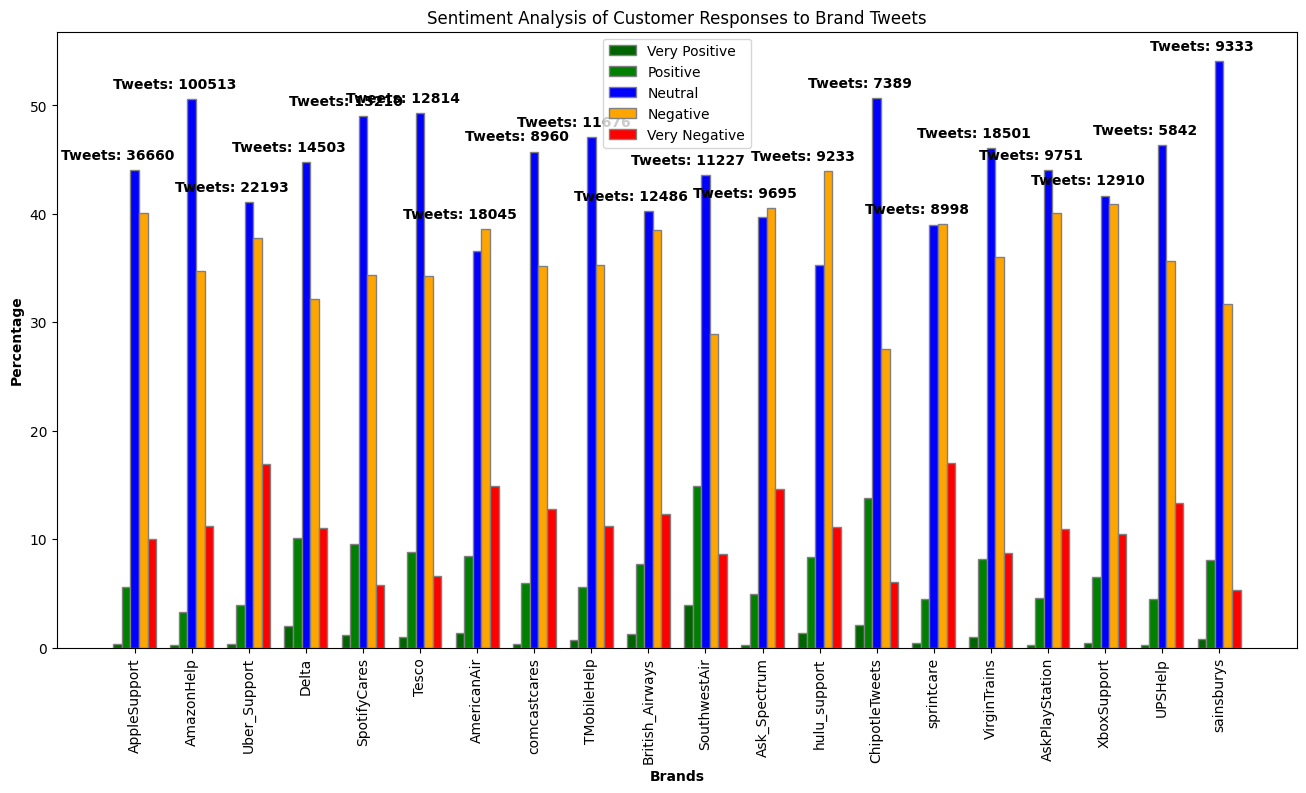

In [ ]:
!pip install transformers
!pip install datasets torch
!pip install -U accelerate
!pip install pandas matplotlib
!pip install pyarrow==14.0.1

import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset, load_metric
from sklearn.model_selection import train_test_split
import torch

class SentimentAnalyzer:
    def __init__(self, model_name='bert-base-uncased'):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model_name = model_name
        self.tokenizer = BertTokenizer.from_pretrained(self.model_name)
        self.model = BertForSequenceClassification.from_pretrained(self.model_name, num_labels=5).to(self.device)

    def clean_tweet(self, tweet):
        """Utility function to clean tweet text by removing links, special characters using simple regex statements."""
        if isinstance(tweet, str):  # Check if tweet is a string
            return ' '.join(re.sub(r"(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
        else:
            return ""  # Return an empty string for non-string values

    def preprocess_data(self, tweets):
        encodings = self.tokenizer(tweets, padding=True, truncation=True, return_tensors="pt")
        encodings = {key: tensor.to(self.device) for key, tensor in encodings.items()}
        return encodings

    def fine_tune_model(self, train_dataset, val_dataset):
        """Fine-tune the BERT model on the given dataset."""
        training_args = TrainingArguments(
            output_dir='./results',
            num_train_epochs=3,
            per_device_train_batch_size=8,
            per_device_eval_batch_size=8,
            warmup_steps=500,
            weight_decay=0.01,
            logging_dir='./logs',
            logging_steps=10,
            evaluation_strategy="epoch",
            save_strategy="epoch"
        )

        trainer = Trainer(
            model=self.model,
            args=training_args,
            train_dataset=train_dataset,
            eval_dataset=val_dataset,
            tokenizer=self.tokenizer,
            compute_metrics=self.compute_metrics
        )

        trainer.train()

    def compute_metrics(self, p):
        metric = load_metric("accuracy")
        logits, labels = p
        predictions = logits.argmax(axis=-1)
        return metric.compute(predictions=predictions, references=labels)

    def get_tweet_sentiment(self, tweet):
        """Utility function to classify the polarity of a tweet using BERT."""
        cleaned_tweet = self.clean_tweet(tweet)
        inputs = self.preprocess_data([cleaned_tweet])
        outputs = self.model(**inputs)
        prediction = outputs.logits.argmax(axis=-1).item()
        return ['very negative', 'negative', 'neutral', 'positive', 'very positive'][prediction]

    def analyze_sentiments(self, tweets_df):
        """Function to perform sentiment analysis on each tweet."""
        tweets_df['clean_text'] = tweets_df['text'].apply(self.clean_tweet)
        tweets_df['sentiment'] = tweets_df['clean_text'].apply(self.get_tweet_sentiment)
        return tweets_df

def analyze_responses_by_brand(tweets, brand):
    """Function to analyze customer responses to a specific brand's tweets."""
    brand_tweets = tweets[tweets['author_id'] == brand]

    if brand_tweets.empty:
        return 0, 0, 0, 0, 0

    # Get the tweet ids of the brand's tweets
    brand_tweet_ids = brand_tweets['tweet_id'].tolist()

    # Find customer tweets that are responses to the brand's tweets
    customer_responses = tweets[tweets['in_response_to_tweet_id'].isin(brand_tweet_ids)]

    if customer_responses.empty:
        return 0, 0, 0, 0, 0

    very_positive_responses = customer_responses[customer_responses['sentiment'] == 'very positive']
    positive_responses = customer_responses[customer_responses['sentiment'] == 'positive']
    neutral_responses = customer_responses[customer_responses['sentiment'] == 'neutral']
    negative_responses = customer_responses[customer_responses['sentiment'] == 'negative']
    very_negative_responses = customer_responses[customer_responses['sentiment'] == 'very negative']

    very_positive_percentage = 100 * len(very_positive_responses) / len(customer_responses)
    positive_percentage = 100 * len(positive_responses) / len(customer_responses)
    neutral_percentage = 100 * len(neutral_responses) / len(customer_responses)
    negative_percentage = 100 * len(negative_responses) / len(customer_responses)
    very_negative_percentage = 100 * len(very_negative_responses) / len(customer_responses)

    return very_positive_percentage, positive_percentage, neutral_percentage, negative_percentage, very_negative_percentage, len(customer_responses)

def analyze_initial_tweets_by_brand(tweets, brand):
    """Function to analyze initial customer tweets directed to a specific brand."""
    # Find initial customer tweets directed at the brand
    initial_tweets = tweets[(tweets['in_response_to_tweet_id'].isnull()) & (tweets['author_id'] != brand)]

    # Find tweets directed at the brand
    initial_tweets_to_brand = initial_tweets[initial_tweets['text'].str.contains(f"@{brand}", na=False)]

    if initial_tweets_to_brand.empty:
        return 0, 0, 0, 0, 0

    very_positive_initial_tweets = initial_tweets_to_brand[initial_tweets_to_brand['sentiment'] == 'very positive']
    positive_initial_tweets = initial_tweets_to_brand[initial_tweets_to_brand['sentiment'] == 'positive']
    neutral_initial_tweets = initial_tweets_to_brand[initial_tweets_to_brand['sentiment'] == 'neutral']
    negative_initial_tweets = initial_tweets_to_brand[initial_tweets_to_brand['sentiment'] == 'negative']
    very_negative_initial_tweets = initial_tweets_to_brand[initial_tweets_to_brand['sentiment'] == 'very negative']

    very_positive_percentage = 100 * len(very_positive_initial_tweets) / len(initial_tweets_to_brand)
    positive_percentage = 100 * len(positive_initial_tweets) / len(initial_tweets_to_brand)
    neutral_percentage = 100 * len(neutral_initial_tweets) / len(initial_tweets_to_brand)
    negative_percentage = 100 * len(negative_initial_tweets) / len(initial_tweets_to_brand)
    very_negative_percentage = 100 * len(very_negative_initial_tweets) / len(initial_tweets_to_brand)

    return very_positive_percentage, positive_percentage, neutral_percentage, negative_percentage, very_negative_percentage, len(initial_tweets_to_brand)

def plot_sentiment_analysis(brands, sentiments, title):
    """Function to plot sentiment analysis results."""
    very_positive = [sentiment[0] if len(sentiment) > 5 else 0 for sentiment in sentiments]
    positive = [sentiment[1] if len(sentiment) > 5 else 0 for sentiment in sentiments]
    neutral = [sentiment[2] if len(sentiment) > 5 else 0 for sentiment in sentiments]
    negative = [sentiment[3] if len(sentiment) > 5 else 0 for sentiment in sentiments]
    very_negative = [sentiment[4] if len(sentiment) > 5 else 0 for sentiment in sentiments]
    tweet_counts = [sentiment[5] if len(sentiment) > 5 else 0 for sentiment in sentiments]  # Handle shorter tuples

    bar_width = 0.15
    x = range(len(brands))

    plt.figure(figsize=(16, 8))
    plt.bar(x, very_positive, color='darkgreen', width=bar_width, edgecolor='grey', label='Very Positive')
    plt.bar([p + bar_width for p in x], positive, color='green', width=bar_width, edgecolor='grey', label='Positive')
    plt.bar([p + bar_width*2 for p in x], neutral, color='blue', width=bar_width, edgecolor='grey', label='Neutral')
    plt.bar([p + bar_width*3 for p in x], negative, color='orange', width=bar_width, edgecolor='grey', label='Negative')
    plt.bar([p + bar_width*4 for p in x], very_negative, color='red', width=bar_width, edgecolor='grey', label='Very Negative')

    plt.xlabel('Brands', fontweight='bold')
    plt.ylabel('Percentage', fontweight='bold')
    plt.xticks([p + bar_width*2 for p in x], brands, rotation=90)
    plt.title(title)
    plt.legend()

    for i in x:
        plt.text(i, max(very_positive[i], positive[i], neutral[i], negative[i], very_negative[i]) + 1, f'Tweets: {tweet_counts[i]}', ha='center', fontweight='bold')

    plt.show()

def main():
    # Path to your extracted CSV file
    csv_file_path = '/content/drive/MyDrive/twcs.csv'  # Make sure this path points to your CSV file

    # Check if the file exists
    if not os.path.isfile(csv_file_path):
        print(f"File not found: {csv_file_path}")
        return

    # Read the CSV file
    try:
        tweets = pd.read_csv(csv_file_path, on_bad_lines='skip', quoting=3)
    except Exception as e:
        print(f"Error reading the CSV file: {e}")
        return

    # Load SST-5 dataset and preprocess it
    sentences = pd.read_csv('/content/datasetSentences.txt', sep='\t')
    labels = pd.read_csv('/content/sentiment_labels.txt', sep='|')
    dictionary = pd.read_csv('/content/dictionary.txt', sep='|', header=None, names=['phrase', 'phrase ids'])
    splits = pd.read_csv('/content/datasetSplit.txt', sep=',')

    # Merge sentences with their phrase IDs
    sentences = sentences.merge(dictionary, left_on='sentence', right_on='phrase')
    sentences = sentences.drop('phrase', axis=1)

    # Merge sentences with their sentiment labels
    sentences = sentences.merge(labels, on='phrase ids')

    # Merge sentences with their dataset split
    sentences = sentences.merge(splits, on='sentence_index')

    # Drop unnecessary columns
    sentences = sentences.drop(['sentence_index', 'phrase ids'], axis=1)

    # Map sentiment values to labels
    def map_sentiment(value):
        if value <= 0.2:
            return 0  # very negative
        elif value <= 0.4:
            return 1  # negative
        elif value <= 0.6:
            return 2  # neutral
        elif value <= 0.8:
            return 3  # positive
        else:
            return 4  # very positive

    sentences['sentiment'] = sentences['sentiment values'].apply(map_sentiment)
    sentences = sentences.drop('sentiment values', axis=1)

    # Split the dataset into train, test, and validation sets
    train_set = sentences[sentences['splitset_label'] == 1].drop('splitset_label', axis=1)
    test_set = sentences[sentences['splitset_label'] == 2].drop('splitset_label', axis=1)
    val_set = sentences[sentences['splitset_label'] == 3].drop('splitset_label', axis=1)

    print("Train set:", train_set.shape)
    print("Test set:", test_set.shape)
    print("Validation set:", val_set.shape)

    sentiment_analyzer = SentimentAnalyzer()
    train_encodings = sentiment_analyzer.tokenizer(train_set['sentence'].tolist(), padding=True, truncation=True, return_tensors="pt")
    val_encodings = sentiment_analyzer.tokenizer(val_set['sentence'].tolist(), padding=True, truncation=True, return_tensors="pt")

    # Convert PyTorch tensors to lists before adding them as columns
    train_set = Dataset.from_dict({
        'input_ids': train_encodings['input_ids'].tolist(),
        'attention_mask': train_encodings['attention_mask'].tolist(),
        'labels': train_set['sentiment'].tolist()
    })

    val_set = Dataset.from_dict({
        'input_ids': val_encodings['input_ids'].tolist(),
        'attention_mask': val_encodings['attention_mask'].tolist(),
        'labels': val_set['sentiment'].tolist()
    })

    sentiment_analyzer.fine_tune_model(train_set, val_set)

    # Perform sentiment analysis on tweets

    chunk_size = 50000

    tweets = pd.DataFrame()
    total_chunks = sum(1 for _ in pd.read_csv(csv_file_path, chunksize=chunk_size))
    processed_chunks = 0

    for chunk in pd.read_csv(csv_file_path, chunksize=chunk_size):
        chunk = sentiment_analyzer.analyze_sentiments(chunk)
        tweets = pd.concat([tweets, chunk])
        processed_chunks += 1
        print(f"Processed chunk {processed_chunks}/{total_chunks}")

    # List of brands to analyze
    brands = [
        'AppleSupport', 'AmazonHelp', 'Uber_Support', 'Delta', 'SpotifyCares',
        'Tesco', 'AmericanAir', 'comcastcares', 'TMobileHelp', 'British_Airways',
        'SouthwestAir', 'Ask_Spectrum', 'hulu_support', 'ChipotleTweets', 'sprintcare',
        'VirginTrains', 'AskPlayStation', 'XboxSupport', 'UPSHelp', 'sainsburys'
    ]

    # Analyze initial customer tweets and customer responses for each brand separately
    initial_sentiments = []
    response_sentiments = []

    for brand in brands:
        initial_sentiments.append(analyze_initial_tweets_by_brand(tweets, brand))
        response_sentiments.append(analyze_responses_by_brand(tweets, brand))

    # Plot the sentiment analysis results
    plot_sentiment_analysis(brands, initial_sentiments, 'Sentiment Analysis of Initial Customer Tweets')
    plot_sentiment_analysis(brands, response_sentiments, 'Sentiment Analysis of Customer Responses to Brand Tweets')

if __name__ == "__main__":
    main()

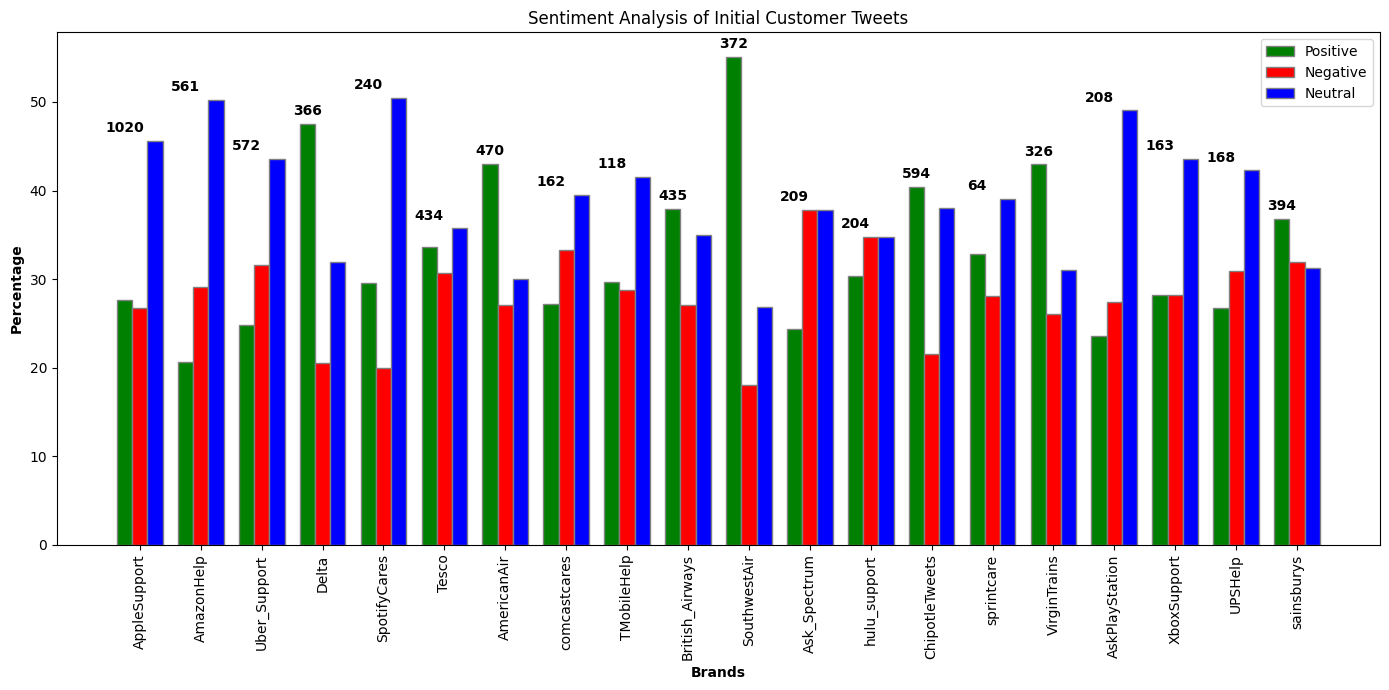

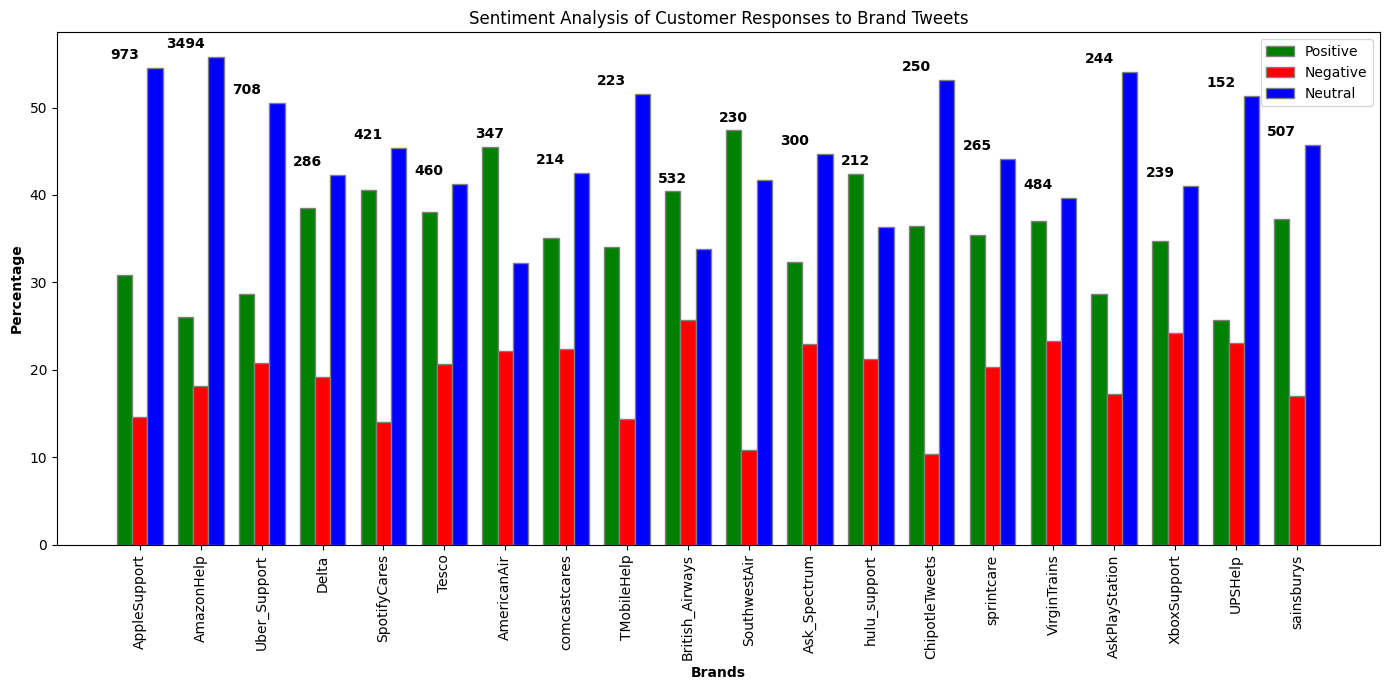

In [ ]:
import os
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

class SentimentAnalyzer:
    def __init__(self, file_path):
        self.file_path = file_path


        """Utility function to clean tweet text by removing links, special characters using simple regex statements."""

    def clean_tweet(self, tweet):
        return ' '.join(re.sub(r"(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

    def get_tweet_sentiment(self, tweet):
        """Utility function to classify the polarity of a tweet using textblob."""
        analysis = TextBlob(self.clean_tweet(tweet))
        # Set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

    def analyze_sentiments(self):
        """Function to read the CSV file and perform sentiment analysis on each tweet."""
        try:
            tweets = pd.read_csv(self.file_path)
        except Exception as e:
            print(f"Error reading the CSV file: {e}")
            return None

        tweets['clean_text'] = tweets['text'].apply(self.clean_tweet)
        tweets['sentiment'] = tweets['clean_text'].apply(self.get_tweet_sentiment)

        return tweets

def analyze_responses_by_brand(tweets, brand):
    """Function to analyze customer responses to a specific brand's tweets."""
    brand_tweets = tweets[tweets['author_id'] == brand]

    if brand_tweets.empty:
        return 0, 0, 0, 0

    # Get the tweet ids of the brand's tweets
    brand_tweet_ids = brand_tweets['tweet_id'].tolist()

    # Find customer tweets that are responses to the brand's tweets
    customer_responses = tweets[tweets['in_response_to_tweet_id'].isin(brand_tweet_ids)]

    if customer_responses.empty:
        return 0, 0, 0, 0

    positive_responses = customer_responses[customer_responses['sentiment'] == 'positive']
    negative_responses = customer_responses[customer_responses['sentiment'] == 'negative']
    neutral_responses = customer_responses[customer_responses['sentiment'] == 'neutral']

    positive_percentage = 100 * len(positive_responses) / len(customer_responses)
    negative_percentage = 100 * len(negative_responses) / len(customer_responses)
    neutral_percentage = 100 * len(neutral_responses) / len(customer_responses)

    return positive_percentage, negative_percentage, neutral_percentage, len(customer_responses)

def analyze_initial_tweets_by_brand(tweets, brand):
    """Function to analyze initial customer tweets directed to a specific brand."""
    # Find initial customer tweets directed at the brand
    initial_tweets = tweets[(tweets['in_response_to_tweet_id'].isnull()) & (tweets['author_id'] != brand)]

    # Find tweets directed at the brand
    initial_tweets_to_brand = initial_tweets[initial_tweets['text'].str.contains(f"@{brand}")]

    if initial_tweets_to_brand.empty:
        return 0, 0, 0, 0

    positive_initial_tweets = initial_tweets_to_brand[initial_tweets_to_brand['sentiment'] == 'positive']
    negative_initial_tweets = initial_tweets_to_brand[initial_tweets_to_brand['sentiment'] == 'negative']
    neutral_initial_tweets = initial_tweets_to_brand[initial_tweets_to_brand['sentiment'] == 'neutral']

    positive_percentage = 100 * len(positive_initial_tweets) / len(initial_tweets_to_brand)
    negative_percentage = 100 * len(negative_initial_tweets) / len(initial_tweets_to_brand)
    neutral_percentage = 100 * len(neutral_initial_tweets) / len(initial_tweets_to_brand)

    return positive_percentage, negative_percentage, neutral_percentage, len(initial_tweets_to_brand)

def plot_sentiment_analysis(brands, sentiments, title):
    """Function to plot sentiment analysis results."""
    positive = [sentiment[0] for sentiment in sentiments]
    negative = [sentiment[1] for sentiment in sentiments]
    neutral = [sentiment[2] for sentiment in sentiments]
    tweet_counts = [sentiment[3] for sentiment in sentiments]

    bar_width = 0.25
    x = range(len(brands))

    plt.figure(figsize=(14, 7))
    plt.bar(x, positive, color='g', width=bar_width, edgecolor='grey', label='Positive')
    plt.bar([p + bar_width for p in x], negative, color='r', width=bar_width, edgecolor='grey', label='Negative')
    plt.bar([p + bar_width*2 for p in x], neutral, color='b', width=bar_width, edgecolor='grey', label='Neutral')

    plt.xlabel('Brands', fontweight='bold')
    plt.ylabel('Percentage', fontweight='bold')
    plt.xticks([p + bar_width for p in x], brands, rotation=90)
    plt.title(title)
    plt.legend()

    for i in x:
        plt.text(i, max(positive[i], negative[i], neutral[i]) + 1, str(tweet_counts[i]), ha='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

def main():
    # Path to your extracted CSV file
    csv_file_path = '/content/twcs.csv'  # Make sure this path points to your CSV file

    # Check if the file exists
    if not os.path.isfile(csv_file_path):
        print(f"File not found: {csv_file_path}")
        return

    # Create an instance of SentimentAnalyzer
    sentiment_analyzer = SentimentAnalyzer(csv_file_path)

    # Perform sentiment analysis
    tweets = sentiment_analyzer.analyze_sentiments()

    if tweets is None:
        print("Failed to perform sentiment analysis due to file read error.")
        return

    # List of brands to analyze
    brands = [
        'AppleSupport', 'AmazonHelp', 'Uber_Support', 'Delta', 'SpotifyCares',
        'Tesco', 'AmericanAir', 'comcastcares', 'TMobileHelp', 'British_Airways',
        'SouthwestAir', 'Ask_Spectrum', 'hulu_support', 'ChipotleTweets', 'sprintcare',
        'VirginTrains', 'AskPlayStation', 'XboxSupport', 'UPSHelp', 'sainsburys'
    ]

    # Analyze initial customer tweets and customer responses for each brand separately
    initial_sentiments = []
    response_sentiments = []

    for brand in brands:
        initial_sentiments.append(analyze_initial_tweets_by_brand(tweets, brand))
        response_sentiments.append(analyze_responses_by_brand(tweets, brand))

    # Plot the sentiment analysis results
    plot_sentiment_analysis(brands, initial_sentiments, 'Sentiment Analysis of Initial Customer Tweets')
    plot_sentiment_analysis(brands, response_sentiments, 'Sentiment Analysis of Customer Responses to Brand Tweets')

if __name__ == "__main__":
    main()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the files
sentences = pd.read_csv('/content/datasetSentences.txt', sep='\t')
labels = pd.read_csv('/content/sentiment_labels.txt', sep='|')
dictionary = pd.read_csv('/content/dictionary.txt', sep='|', header=None, names=['phrase', 'phrase ids'])
splits = pd.read_csv('/content/datasetSplit.txt', sep=',')

# Merge sentences with their phrase IDs
sentences = sentences.merge(dictionary, left_on='sentence', right_on='phrase')
sentences = sentences.drop('phrase', axis=1)

# Merge sentences with their sentiment labels
sentences = sentences.merge(labels, on='phrase ids')

# Merge sentences with their dataset split
sentences = sentences.merge(splits, on='sentence_index')

# Drop unnecessary columns
sentences = sentences.drop(['sentence_index', 'phrase ids'], axis=1)

# Map sentiment values to labels
def map_sentiment(value):
    if value <= 0.2:
        return 'very negative'
    elif value <= 0.4:
        return 'negative'
    elif value <= 0.6:
        return 'neutral'
    elif value <= 0.8:
        return 'positive'
    else:
        return 'very positive'

sentences['sentiment'] = sentences['sentiment values'].apply(map_sentiment)
sentences = sentences.drop('sentiment values', axis=1)

# Now you have a DataFrame with sentences and their corresponding sentiment labels
print(sentences.head())

# Split the dataset into train, test, and validation sets
train_set = sentences[sentences['splitset_label'] == 1].drop('splitset_label', axis=1)
test_set = sentences[sentences['splitset_label'] == 2].drop('splitset_label', axis=1)
val_set = sentences[sentences['splitset_label'] == 3].drop('splitset_label', axis=1)

print("Train set:", train_set.shape)
print("Test set:", test_set.shape)
print("Validation set:", val_set.shape)


                                            sentence  splitset_label  \
0  The Rock is destined to be the 21st Century 's...               1   
1  The gorgeously elaborate continuation of `` Th...               1   
2                     Effective but too-tepid biopic               2   
3  If you sometimes like to go to the movies to h...               2   
4  Emerges as something rare , an issue movie tha...               2   

       sentiment  
0       positive  
1  very positive  
2        neutral  
3       positive  
4  very positive  
Train set: (8117, 2)
Test set: (2125, 2)
Validation set: (1044, 2)


True


# New Section